In [18]:
import pandas as pd
import json
import glob
import tarfile
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


In [41]:
def map_range(x, x1, x2, y1, y2):
    return y1 + (y2 - y1) * (x - x1) / (x2 - x1)

In [8]:
# Decompress data_finalized.tar.gz

tar = tarfile.open("data_finalized.tar.gz")
tar.extractall()

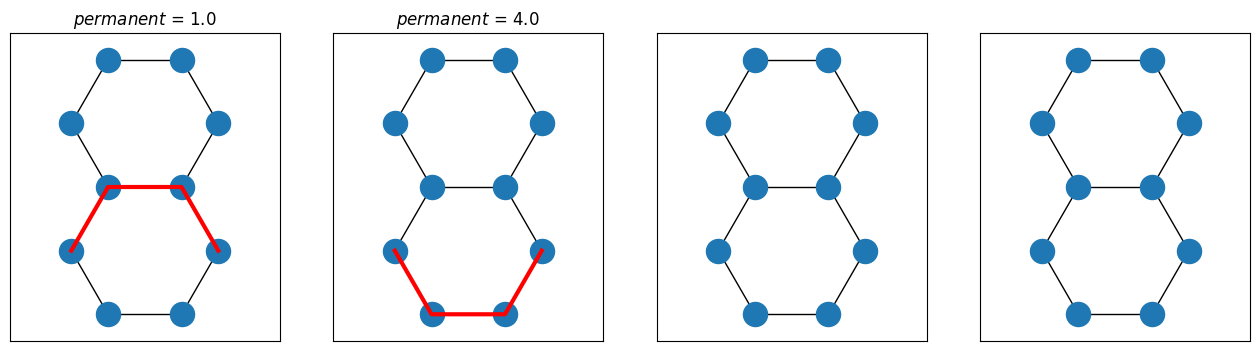

In [131]:
folders = glob.glob("data/*")

for folder in ["data/junction_48589901"]:

    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

    # load adjacency matrix
    adjacancy_matrix = np.loadtxt(folder + "/adjacancy.txt", delimiter=" ")
    properties = json.load(open(folder + "/properties.json", "r"))
    sites_x = [site['x'] for site in properties['sites']]
    sites_y = [site['y'] for site in properties['sites']]
    sites_index = [site['index'] for site in properties['sites']]

    G = nx.Graph()
    G.add_nodes_from(sites_index)

    for i in range(len(sites_index)):
        for j in range(len(sites_index)):
            if adjacancy_matrix[i][j] == 1:
                G.add_edge(sites_index[i], sites_index[j])

    # draw
    pos = {}
    for i in range(len(sites_index)):
        pos[sites_index[i]] = (sites_x[i], sites_y[i])

    for i in range(4):
        nx.draw_networkx_nodes(G, pos, ax=axes[i])
        nx.draw_networkx_edges(G, pos, ax=axes[i])
        axes[i].axis('equal')

    paths_file = json.load(open(folder + "/paths.json", "r"))
    paths: list = paths_file['pathsdetailed']
    # shuffle 'paths'
    np.random.shuffle(paths)
    logpermanents_drawn = []
    for path in paths:
        path_indices: list = path['path']
        path_x = [sites_x[i] for i in path_indices]
        path_y = [sites_y[i] for i in path_indices]
        # path_x += np.random.normal(0, 0.1, len(path_x))
        # path_y += np.random.normal(0, 0.1, len(path_y))
        permanent = path['permanent']
        if path['permanent'] <= 0:
            continue
        logpermanent = np.log(path['permanent']) / np.log(4)
        if logpermanent in logpermanents_drawn:
            continue
        # axes[int(logpermanent)].plot(path_x, path_y, color=plt.cm.turbo(map_range(logpermanent, 0, 3, 0, 1)), alpha=1, lw=5)
        axes[int(logpermanent)].plot(path_x, path_y, color="r", alpha=1, lw=3)
        logpermanents_drawn.append(logpermanent)
        axes[int(logpermanent)].set_title("$permanent$ = " + str(4**logpermanent))
    break

